<a href="https://colab.research.google.com/github/Phaneendra-S/BTP/blob/main/code2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
urldata=pd.read_csv("url_spam_classification.csv")
urldata.info()


# urldata1=pd.DataFrame(urldata,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148303 entries, 0 to 148302
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   url      148303 non-null  object
 1   is_spam  148303 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.3+ MB


In [3]:
urldata.is_spam = urldata.is_spam.replace({True: 1, False: 0})

In [4]:
urldata.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


In [5]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['is_spam']==1])/len(urldata['is_spam'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['is_spam']==0])/len(urldata['is_spam'])*100))
urldata.info()

Percent Of Malicious URLs:31.88 %
Percent Of Benign URLs:68.12 %
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148303 entries, 0 to 148302
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   url      148303 non-null  object
 1   is_spam  148303 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


Text(0, 0.5, 'Number Of URLs')

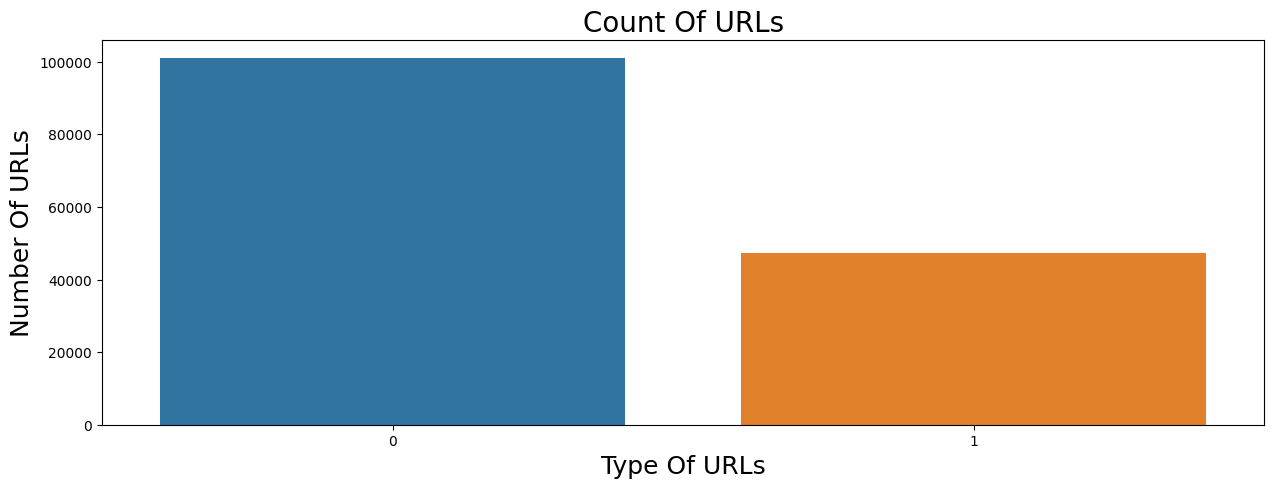

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(x='is_spam',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Classifiers And Feature Extraction

In [7]:
!pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 9.0 MB/s eta 0:00:00


In [8]:
from urllib.parse import urlparse
from tld import get_tld
import os
import os.path

In [9]:
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [10]:
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [11]:
urldata.head(3)


,url,is_spam,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://briefingday.us8.list-manage.com/unsubs...,1,51,31,12,11,com,3
1,https://www.hvper.com/,1,22,13,1,0,com,3
2,https://briefingday.com/m/v4n3i4f3,1,34,15,11,1,com,3


In [12]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [13]:
urldata.head(3)

,url,is_spam,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www
0,https://briefingday.us8.list-manage.com/unsubs...,1,51,31,12,11,com,3,1,0,0,0,3,0,1,1,0
1,https://www.hvper.com/,1,22,13,1,0,com,3,0,0,0,0,2,0,1,1,1
2,https://briefingday.com/m/v4n3i4f3,1,34,15,11,1,com,3,0,0,0,0,1,0,1,1,0


In [14]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [15]:
# urldata.drop()
# urldata.head()
urldata.tail()
# urldata.isnull().mean()
# urldata.isna().mean()

,url,is_spam,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
148298,"https://cdn.substack.com/image/fetch/f_auto,q_...",1,223,16,199,5,com,3,9,0,0,6,6,0,2,2,0,52,135,4
148299,https://numlock.substack.com/subscribe,1,38,20,10,9,com,3,0,0,0,0,2,0,1,1,0,0,32,1
148300,https://docs.google.com/forms/d/e/1FAIpQLSfDLO...,1,99,15,76,5,com,3,0,0,0,0,2,0,1,1,0,11,78,5
148301,https://bookclub.substack.com/,1,30,21,1,0,com,3,0,0,0,0,2,0,1,1,0,0,24,1
148302,https://awards.substack.com/,1,28,19,1,0,com,3,0,0,0,0,2,0,1,1,0,0,22,1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [17]:
x = urldata[['url_length', 'hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir']]
y = urldata['is_spam']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# x_train.head(3)
# x_test.head(3)
# y_train.head(3)
# y_test.head(3)

In [19]:
# Create a logistic regression classifier
log_model = LogisticRegression(max_iter = 100000)

# Create a decision tree classifier
dt_model = DecisionTreeClassifier()

# Create a support vector machine classifier
svc_model = SVC()

# Create a random forest classifier
rfc_model = RandomForestClassifier()

# Initialize the LGBMClassifier
lgbm = LGBMClassifier(
    boosting_type='gbdt',         # Gradient boosting algorithm
    n_estimators=100,             # Number of trees to fit
    learning_rate=0.1,            # Learning rate for gradient boosting
    num_leaves=31,                # Number of leaves for each tree
    objective='binary',           # Binary classification problem
    random_state=42               # For reproducibility
)

# Initialize the AdaBoostClassifier
adaboost = AdaBoostClassifier(
    n_estimators=100,     # Number of trees to fit
    learning_rate=0.1,    # Learning rate for the weights update
    random_state=42       # For reproducibility
)

# Initialize the XGBClassifier
xgb = XGBClassifier(
    objective='binary:logistic',  # Binary classification problem
    n_estimators=100,             # Number of trees to fit
    learning_rate=0.1,            # Learning rate for gradient boosting
    max_depth=3,                  # Maximum depth of each tree
    random_state=42               # For reproducibility
)

# Train the classifiers on the training set
dt_model.fit(x_train, y_train)
svc_model.fit(x_train, y_train)
log_model.fit(x_train, y_train)
rfc_model.fit(x_train, y_train)
lgbm.fit(x_train, y_train)
adaboost.fit(x_train, y_train)
xgb.fit(x_train, y_train)

# Evaluate the classifiers on the testing set
dt_predictions = dt_model.predict(x_test)
svc_predictions = svc_model.predict(x_test)
log_predictions = log_model.predict(x_test)
rfc_predictions = rfc_model.predict(x_test)
lgbm_predictions = lgbm.predict(x_test)
adaboost_predictions = adaboost.predict(x_test)
xgb_predictions = xgb.predict(x_test)
                                    
# Print the accuracy scores
print("Decision tree accuracy:", accuracy_score(y_test, dt_predictions))
print("Support vector machine accuracy:", accuracy_score(y_test, svc_predictions))
print("Logistic regression accuracy:", accuracy_score(y_test, log_predictions))
print("Random forest accuracy:", accuracy_score(y_test, rfc_predictions))
print("LGBM classifier accuracy:", accuracy_score(y_test, lgbm_predictions))
print("AdaBoost classifier accuracy:", accuracy_score(y_test, adaboost_predictions))
print("XGBoost classifier accuracy:", accuracy_score(y_test, xgb_predictions))

Decision tree accuracy: 0.9447079184554179
Support vector machine accuracy: 0.802791575824324
Logistic regression accuracy: 0.8195590119349981
Random forest accuracy: 0.9530017306871053
LGBM classifier accuracy: 0.9078914836708548
AdaBoost classifier accuracy: 0.8100964239958643
XGBoost classifier accuracy: 0.8519251084488998


In [20]:
from keras.models import Sequential
from keras.layers import Dense

# Convert the data to numpy arrays
X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)

# Define the architecture of the neural network
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Make predictions on the testing data
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

print("Neural Networks accuracy:", accuracy_score(y_test, y_pred))

Epoch 1/20
3245/3245 [==============================] - 16s 3ms/step - loss: 0.8577 - accuracy: 0.7588
Epoch 2/20
3245/3245 [==============================] - 10s 3ms/step - loss: 0.4030 - accuracy: 0.8035
Epoch 3/20
3245/3245 [==============================] - 10s 3ms/step - loss: 0.3960 - accuracy: 0.8086
Epoch 4/20
3245/3245 [==============================] - 10s 3ms/step - loss: 0.3943 - accuracy: 0.8108
Epoch 5/20
3245/3245 [==============================] - 10s 3ms/step - loss: 0.3916 - accuracy: 0.8133
Epoch 6/20
3245/3245 [==============================] - 10s 3ms/step - loss: 0.3900 - accuracy: 0.8143
Epoch 7/20
3245/3245 [==============================] - 10s 3ms/step - loss: 0.3896 - accuracy: 0.8159
Epoch 8/20
3245/3245 [==============================] - 10s 3ms/step - loss: 0.3883 - accuracy: 0.8177
Epoch 9/20
3245/3245 [==============================] - 10s 3ms/step - loss: 0.3866 - accuracy: 0.8195
Epoch 10/20
3245/3245 [==============================] - 10s 3ms/step - l

In [21]:
# import pandas as pd
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from sklearn.model_selection import train_test_split

# # Load the data
# data = urldata

# # Split the data into input features and target variable
# x = data.drop(labels=["label"], axis=1)
# y = data["label"]

# # Normalize the data
# # x = x / 255.0

# # Reshape the data for use in a CNN
# x = x.values.reshape(-1, 28, 28, 1)

# # Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Define the CNN model
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation="softmax"))

# # Compile the model
# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# # Fit the model to the training data
# model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# # Evaluate the model on the testing data
# score = model.evaluate(x_test, y_test, verbose=0)
# print("Test loss:", score[0])
# print("Test accuracy:", score[1])

# # Make predictions on the test data
# predictions = model.predict(x_test)

# # Convert the predictions to class labels
# labels = np.argmax(predictions, axis=1)

# # Print the confusion matrix
# from sklearn.metrics import confusion_matrix
# conf_matrix = confusion_matrix(y_test, labels)
# print(conf_matrix)


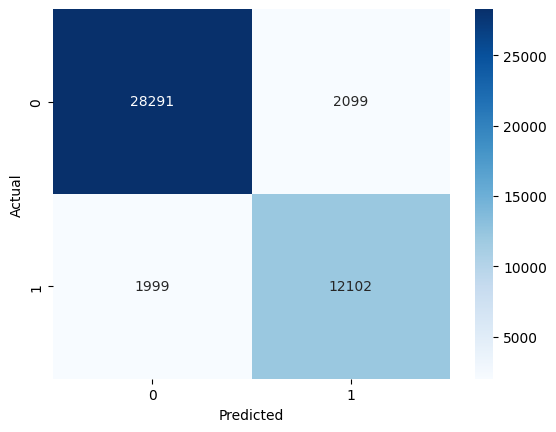

In [22]:
# Compute the confusion matrix for lgbm
cm_lgbm = confusion_matrix(y_test, lgbm_predictions)

# Print the confusion matrix as a heatmap
sns.heatmap(cm_lgbm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

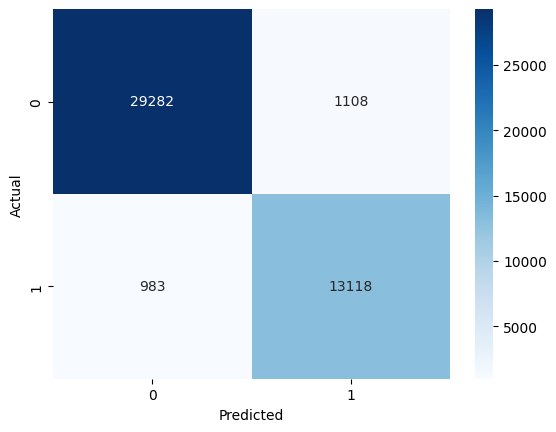

In [23]:
# Compute the confusion matrix for lgbm
cm_rfc = confusion_matrix(y_test, rfc_predictions)

# Print the confusion matrix as a heatmap
sns.heatmap(cm_rfc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
#cross validation for LGBM Classifier
from sklearn.model_selection import cross_val_score,KFold
X=x_train
Y=y_train
crossval_lgbm=LGBMClassifier()
kf=KFold(n_splits=10)
score=cross_val_score(crossval_lgbm,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.90387209 0.9123483  0.91551874 0.90742703 0.9063674  0.90896831
 0.91137655 0.91156921 0.91301416 0.90463346]
Average Cross Validation score :0.9095095248975875


In [25]:
#cross validation for RF Classifier
from sklearn.model_selection import cross_val_score,KFold
X=x_train
Y=y_train
crossval_rfc=RandomForestClassifier()
kf=KFold(n_splits=10)
score=cross_val_score(crossval_rfc,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.9479869  0.95472934 0.95366535 0.95539929 0.95270205 0.9512571
 0.954147   0.95202774 0.95559195 0.95231673]
Average Cross Validation score :0.9529823454750058
